# 01. Import Libraries

In [9]:
# Import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

# Create path

In [11]:
# create path
path=r'C:\Users\baidy\Downloads\11-2024 Instacart Basket Analysis'

# Import Dataframe

In [13]:
# Import Dataframe
ords_prods_customer_merge=pd.read_pickle(os.path.join(path,'02 Data','Prepared Data','ords_prods_customer_merge.pkl'))

# 02. Create Bar chart,Histogram,Scatterplot,and Line chart

<Axes: xlabel='orders_day_of_week'>

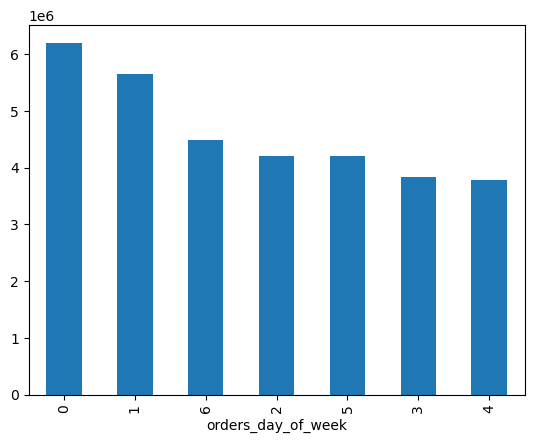

In [15]:
# Create Bar chart of 'orders_day_of_week' column
ords_prods_customer_merge['orders_day_of_week'].value_counts().plot.bar()

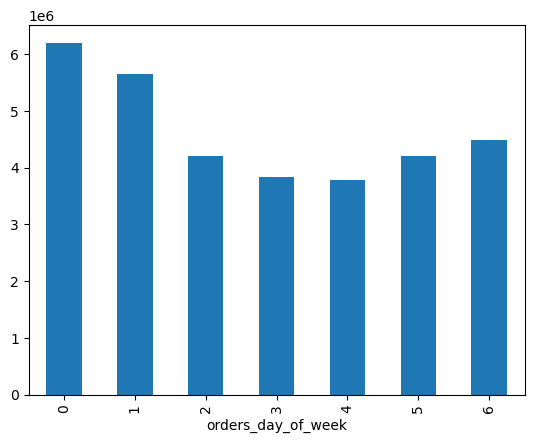

In [16]:
# Change the bar according to the index order with the function 'sort_index()'
bar=ords_prods_customer_merge['orders_day_of_week'].value_counts().sort_index().plot.bar()

In [17]:
# Checking the frequency
ords_prods_customer_merge['orders_day_of_week'].value_counts().sort_index()

orders_day_of_week
0    6204182
1    5660230
2    4213830
3    3840534
4    3783802
5    4205791
6    4496490
Name: count, dtype: int64

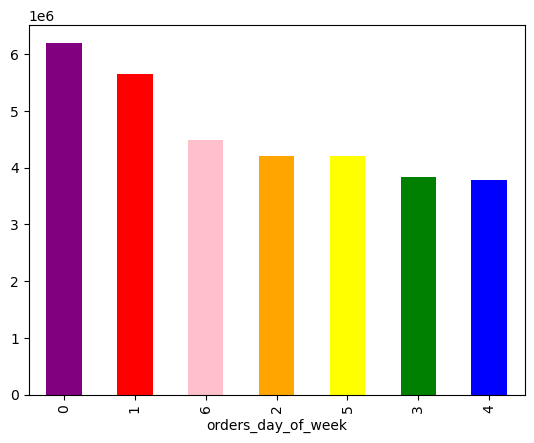

In [18]:
# Adding colors
bar=ords_prods_customer_merge['orders_day_of_week'].value_counts().plot.bar(color=['purple','red','pink','orange','yellow','green','blue'])

# Creating Histogram

<Axes: ylabel='Frequency'>

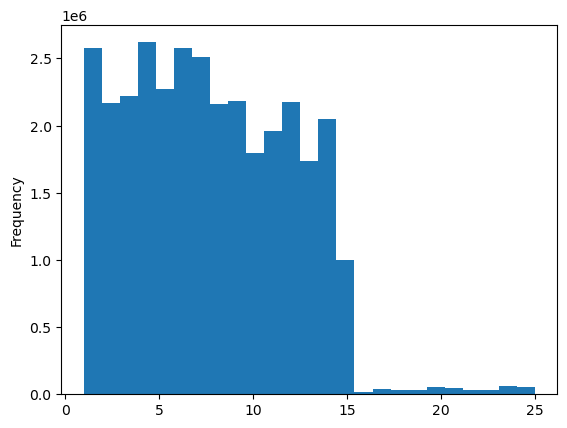

In [20]:
# creating histogram of 'prices' column
ords_prods_customer_merge['prices'].plot.hist(bins=25)

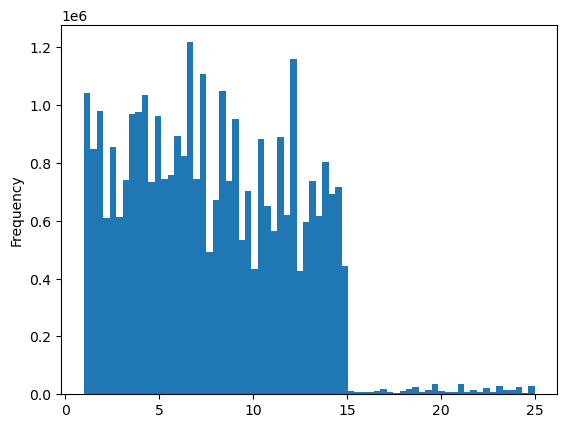

In [21]:
# Increase the level of granurality in the histogram
hist_2=ords_prods_customer_merge['prices'].plot.hist(bins=70)

# Creating Scatterplots

<Axes: xlabel='prices', ylabel='prices'>

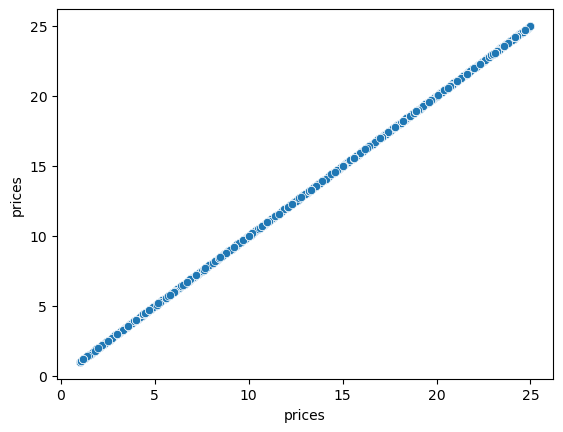

In [23]:
# creating scatterplots
sns.scatterplot(x='prices',y='prices',data=ords_prods_customer_merge)

# Crearing line chart

# Sampling Data

In [26]:
# 
np.random.seed(4)
dev=np.random.rand(len(ords_prods_customer_merge))<=0.7

In [27]:
dev

array([False,  True, False, ...,  True,  True,  True])

In [28]:
np.random.rand(10)

array([0.93546686, 0.06557465, 0.85698584, 0.24456371, 0.22683171,
       0.17068366, 0.27008946, 0.52534234, 0.83151571, 0.78153402])

In [29]:
# create a list holding True/False values to the test np.random.rant()<=0.7
dev=np.random.rand(len(ords_prods_customer_merge))<=0.7

In [30]:
# Store 70% of the sample in the dataframe big
big=ords_prods_customer_merge[dev]

In [31]:
# Store 30% of the sample in the dataframe small
small=ords_prods_customer_merge[~dev]

In [32]:
len(ords_prods_customer_merge)

32404859

In [33]:
len(big)+len(small)

32404859

In [34]:
# Create new dataframe df_2 that contains only 'prices' and 'orders_day_of_week' columns from small subset
df_2=small[['orders_day_of_week','prices']]

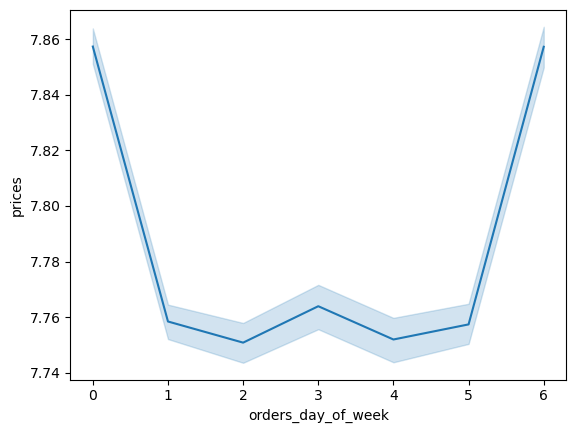

In [35]:
# Create the line chart
line=sns.lineplot(data=df_2,x='orders_day_of_week',y='prices')

# 03. Create histogram of 'order_hour_of_day'

<Axes: ylabel='Frequency'>

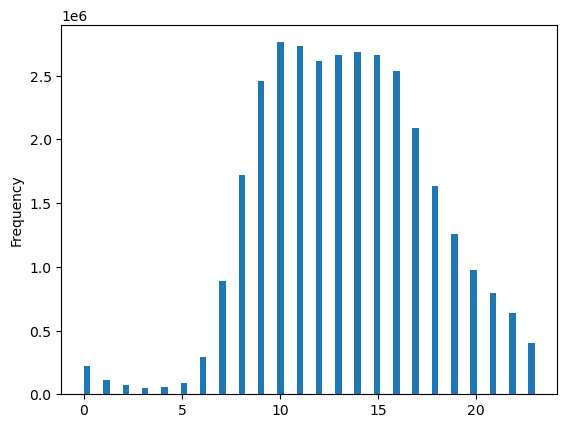

In [37]:
# create histogram of 'order_hour_of_day'
ords_prods_customer_merge['order_hour_of_day'].plot.hist(bins=70)

# Observation:
The histogram represents the distribution of order of the hour of the day.The highest frequency of order occurs between 10 am and 15 pm, indicating this is the bigest time for sales.A noticeable plateau exists between 11 am and 14 pm, suggesting consistantly high activity.Orders are significantly lower during early morning before 7 am and late evening after 21 pm.The least activity occurs during the early hours around 3 am to 6 am.There is a gradual increase in orders from 6 am  peaking by late morning.After the peak the order frequency begins to decline steadily post 15 pm, with sharper drops after 18 pm.

# 04. Create bar chart from the 'loyalty_flag' column

<Axes: xlabel='loyalty_flag'>

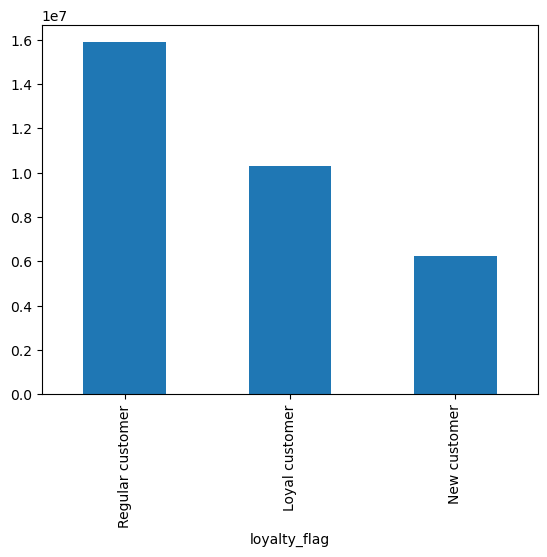

In [40]:
ords_prods_customer_merge['loyalty_flag'].value_counts().plot.bar()

# Observation:



# 05. Checking whether there is a difference in expenditure

In [43]:
# creating line chart
df_4=small[['order_hour_of_day','prices']]

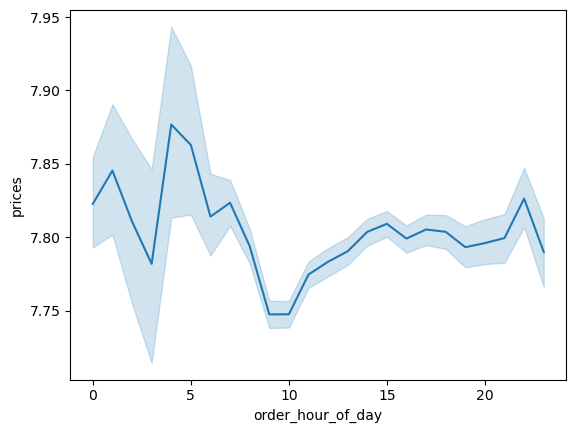

In [44]:
line_2=sns.lineplot(data=df_4,x='order_hour_of_day',y='prices')

# Observation:
The lineplot shows the fluctuation in price throughout the day. There are higher price variations during early hours possibly due to greater volatility in orders, adeep around mid morning, followed by a steady increase in the afternoon , and another rise toward the evening. 

# 06. Exploratory analysis of customer demographics

In [47]:
# creating line chart for 'Age'and 'fam_status'
df_5=small[['Age','fam_status']]

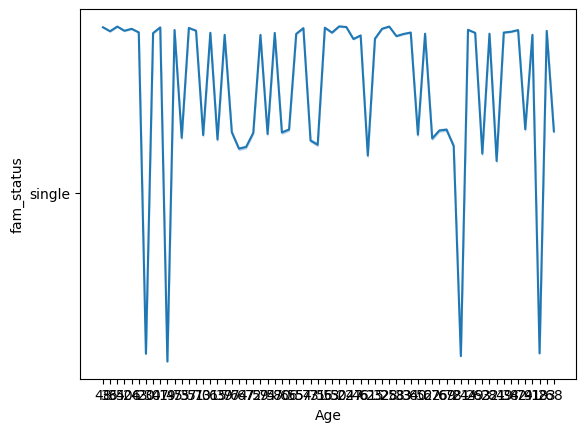

In [48]:
line_3=sns.lineplot(data=df_5,x='Age',y='fam_status')

# Observation:
The lineplot shows the relationship between age and the family status of the customers. This line chart shows that the customers are mostly married .

In [50]:
# creating line chart for 'Age'and 'no_of_dependants'
df_6=small[['Age','no_of_dependants']]

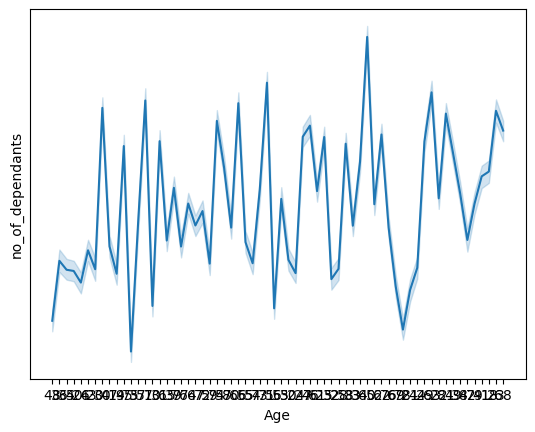

In [51]:
line_4=sns.lineplot(data=df_6,x='Age',y='no_of_dependants')

# Observation:
 The lineplot shows the relationship between age and the number of dependants of the customers. There is mixed patern we can see from the chart. 

# 07. Explore the connection between Age and spending power (income)

In [54]:
df_7=small[['Age','income']]

<Axes: xlabel='Age', ylabel='income'>

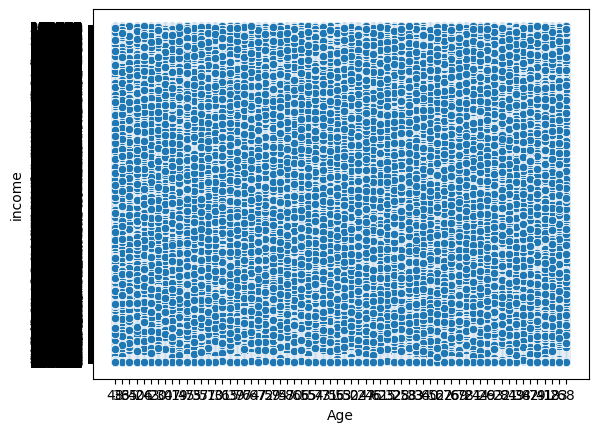

In [55]:
# Creating scatterplots for colums 'Age' and 'income'
sns.scatterplot(x='Age',y='income', data=df_7)

# Observation:
The scatterplot appear overly crowded ,its dificult to understand the  patern of the relationship here .

# Export the isualizations

In [58]:
bar.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','bar_orders_day_of_week.png'))

# Export the dataframe as a pickle file

In [60]:
# Export dataframe
ords_prods_customer_merge.to_pickle(os.path.join(path,'02 Data','Prepared Data','ords_prods_customer_merge.pkl'))